In [5]:
%matplotlib inline

In [245]:
n = 5000

x = np.random.uniform(-2, 2, size=n)
y = np.random.uniform(-2, 2, size=n)
xt = .8
xc = .1

yt = 1.2
yc = .1

rx = np.where(x - xt > 0, np.exp((x - xt)*2) - 1, 0)
ry = np.where(np.abs(y) - yt > 0, np.exp((np.abs(y) - yt)*2) - 1, 0)

rexp = 1 / (1 + np.exp(-(rx + ry + np.random.normal(0, .01, size=n))))
#rexp = 1 / (1 + np.exp(-(ry + np.random.normal(0, .01, size=n))))
r = [np.random.binomial(1, p, size=1)[0] for p in rexp]

d = pd.DataFrame({'r': r, 'x': x, 'y': y})
m = 5
for i in range(m):
    d['f{}'.format(i)] = np.random.normal(size=n)
X, y = d[[c for c in d if c != 'r']], d['r']

#d = pd.DataFrame({'ry': ry, 'rx': rx, 'y': y, 'x': x, 'r': r, 'rexp': rexp})
#d.plot(kind='scatter', x='y', y='rexp')
#d.plot(kind='scatter', x='y', y='r')

In [246]:
from sklearn.ensemble import GradientBoostingClassifier
from ml.model import models as ml_models
from ml.model import summaries as ml_precis
from ml.model import grids as ml_grids

In [247]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

grid = {
    'learning_rate': [.1, .05, .02, .01],
    'max_depth': [2, 4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'max_features': [1., .3, .1, None],
    'n_estimators': [10, 50]
}

clfs = {
    'gbr': GradientBoostingClassifier(),
    'etr': ExtraTreesClassifier(),
    'rfc': RandomForestClassifier(),
    'lr1': LogisticRegression(penalty='l1', solver='liblinear'),
    'lr2': LogisticRegressionCV()
}
cv = StratifiedKFold(y, n_folds=5)
res = ml_models.run_classifiers(X, y, clfs, cv)

INFO:ml.model.log:Running model lr2 (LogisticRegressionCV) on fold 1
INFO:ml.model.log:Running model lr1 (LogisticRegression) on fold 1
INFO:ml.model.log:Running model rfc (RandomForestClassifier) on fold 1
INFO:ml.model.log:Running model etr (ExtraTreesClassifier) on fold 1
INFO:ml.model.log:Running model gbr (GradientBoostingClassifier) on fold 1
INFO:ml.model.log:Running model lr2 (LogisticRegressionCV) on fold 2
INFO:ml.model.log:Running model lr1 (LogisticRegression) on fold 2
INFO:ml.model.log:Running model rfc (RandomForestClassifier) on fold 2
INFO:ml.model.log:Running model etr (ExtraTreesClassifier) on fold 2
INFO:ml.model.log:Running model gbr (GradientBoostingClassifier) on fold 2
INFO:ml.model.log:Running model lr2 (LogisticRegressionCV) on fold 3
INFO:ml.model.log:Running model lr1 (LogisticRegression) on fold 3
INFO:ml.model.log:Running model rfc (RandomForestClassifier) on fold 3
INFO:ml.model.log:Running model etr (ExtraTreesClassifier) on fold 3
INFO:ml.model.log:Runn

Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


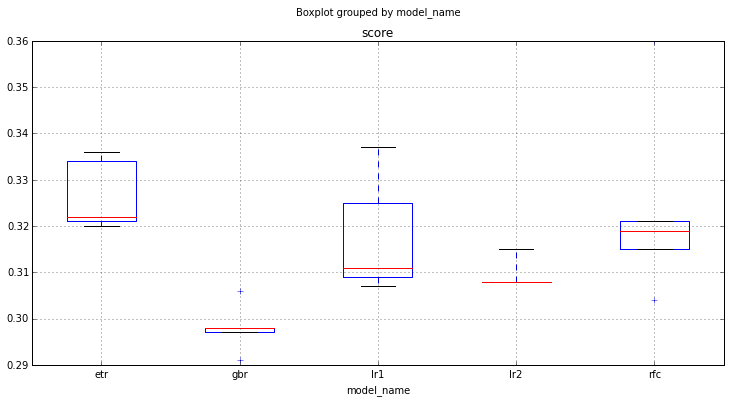

In [248]:
from sklearn.metrics import accuracy_score
def score_func(clf, y_true, y_pred):
    return accuracy_score(y_true, y_pred)
ml_precis.plot_model_scores(res)

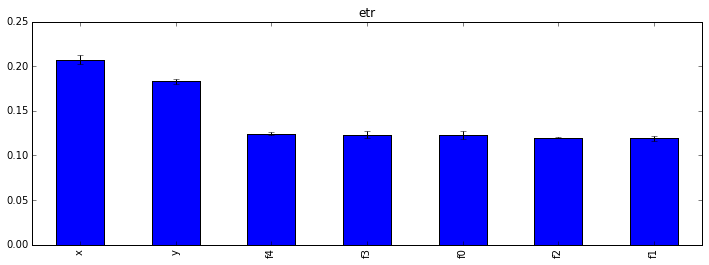

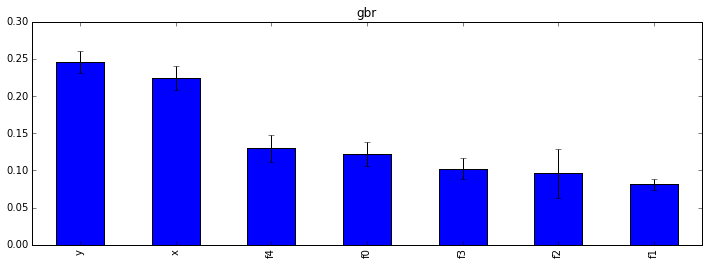

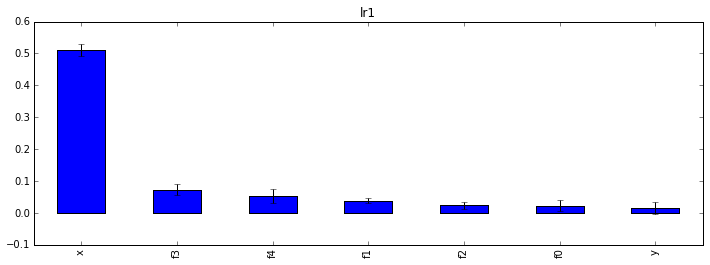

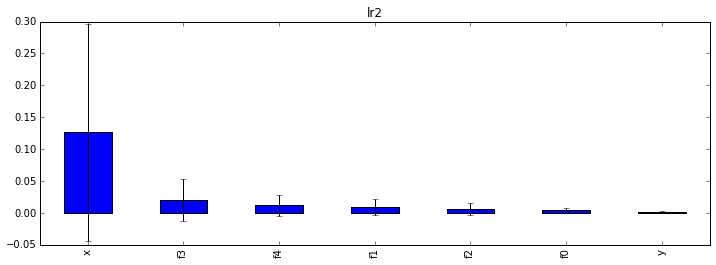

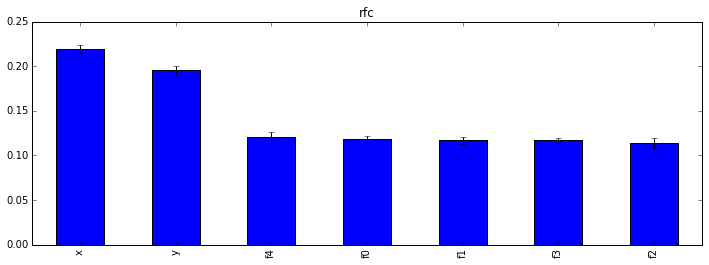

In [249]:
ml_precis.plot_feature_importance(res)

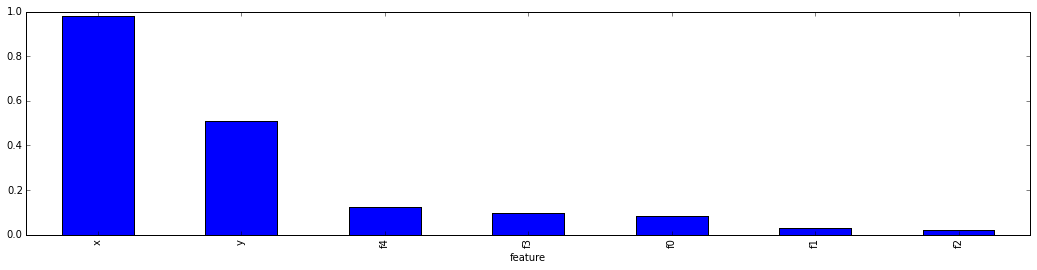

In [250]:
ml_precis.plot_weighted_feature_importances(res, score_func)

(<matplotlib.figure.Figure at 0x137b17160>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x137f61320>])

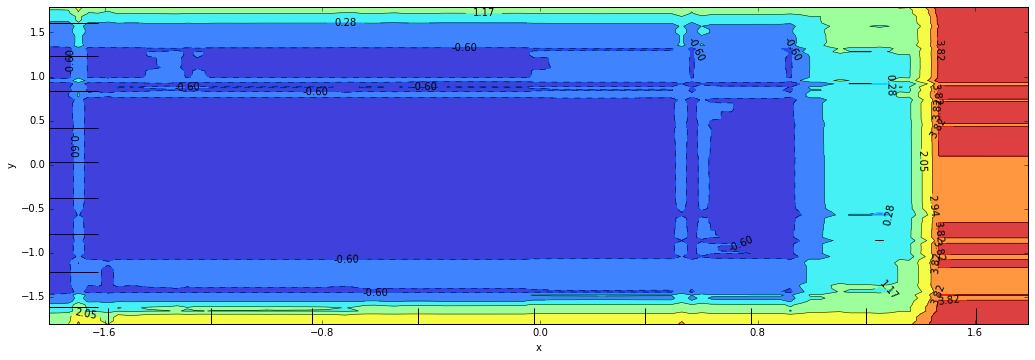

In [259]:
#gbr = GridSearchCV(GradientBoostingClassifier(), grid, n_jobs=-1)
gbr = GradientBoostingClassifier(n_estimators=1000, learning_rate=.05)
gbr.fit(X, y)
#print(gbr.best_params_)
ml_precis.plot_partial_dependence(gbr, X, [('x', 'y')], percentiles=[0, 1], figsize=(16, 8))

In [101]:
print(gbr.best_params_)

{'min_samples_leaf': 9, 'n_estimators': 250, 'max_depth': 4, 'max_features': 1.0, 'learning_rate': 0.02}
